# Remote data access using pandas

The pandas library enables access to data displayed on websites using the `read_html()` function and access to the API endpoints of various data providers through the related `pandas-datareader` library.

## Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

## Download html table with SP500 constituents

The download of the content of one or more html tables works as follows, for instance for the constituents of the S&P500 index from Wikipedia

In [5]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(sp_url, header=0)[0]

In [6]:
sp500_constituents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [7]:
sp500_constituents.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


## pandas-datareader for Market Data

`pandas` used to facilitate access to data providers' APIs directly, but this functionality has moved to the related pandas-datareader library. The stability of the APIs varies with provider policies, and as of June 2o18 at version 0.7, the following sources are available

See [documentation](https://pandas-datareader.readthedocs.io/en/latest/); functionality frequently changes as underlying provider APIs evolve.

### Yahoo Finance

In [21]:
#start = '2014'
#end = datetime(2017, 5, 24)

#yahoo= web.DataReader('META', 'yahoo', start=start, end=end)

import yfinance as yf
yahoo = yf.download("META", start='2014-01-01', end='2017-5-24')

yahoo.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 854 entries, 2014-01-02 to 2017-05-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       854 non-null    float64
 1   High       854 non-null    float64
 2   Low        854 non-null    float64
 3   Close      854 non-null    float64
 4   Adj Close  854 non-null    float64
 5   Volume     854 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 46.7 KB


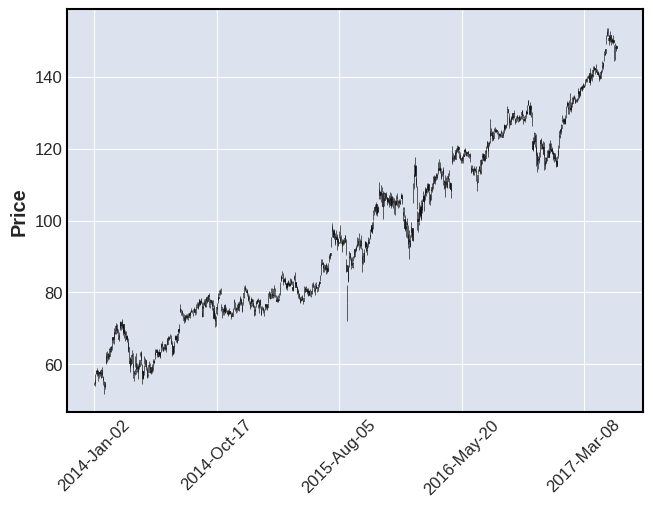

<Figure size 640x480 with 0 Axes>

In [22]:
mpf.plot(yahoo.drop('Adj Close', axis=1), type='candle')
plt.tight_layout()

### IEX

IEX is an alternative exchange started in response to the HFT controversy and portrayed in Michael Lewis' controversial Flash Boys. It aims to slow down the speed of trading to create a more level playing field and has been growing rapidly since launch in 2016 while still small with a market share of around 2.5% in June 2018.

> **Note:** IEX now requires an [API](https://iexcloud.io/) key after registration for (free) account that you can store as environment variable and retrieve as illustrated below, or pass directly via keyword argument to `pandas_datareader`.

In [9]:
IEX_API_KEY=os.getenv('IEX_API_KEY')

In [10]:
start = datetime(2015, 2, 9)
# end = datetime(2017, 5, 24)

iex = web.DataReader('FB', 'iex', start, api_key=IEX_API_KEY)
iex.info()

ValueError: The IEX Cloud API key must be provided either through the api_key variable or through the  environment variable IEX_API_KEY

In [13]:
iex.tail()

NameError: name 'iex' is not defined

In [14]:
sns.set_style('whitegrid')
iex.close.plot(figsize=(14, 5))
sns.despine()

NameError: name 'iex' is not defined

#### Book Data

In addition to historical EOD price and volume data, IEX provides real-time depth of book quotations that offer an aggregated size of orders by price and side. This service also includes last trade price and size information.

DEEP is used to receive real-time depth of book quotations direct from IEX. The depth of book quotations received via DEEP provide an aggregated size of resting displayed orders at a price and side, and do not indicate the size or number of individual orders at any price level. Non-displayed orders and non-displayed portions of reserve orders are not represented in DEEP.

DEEP also provides last trade price and size information. Trades resulting from either displayed or non-displayed orders matching on IEX will be reported. Routed executions will not be reported.

Only works on trading days.

In [15]:
book = web.get_iex_book('AAPL')

TypeError: Failed to interpret response as JSON.

In [ ]:
list(book.keys())

In [ ]:
orders = pd.concat([pd.DataFrame(book[side]).assign(side=side) for side in ['bids', 'asks']])
orders.head()

In [15]:
for key in book.keys():
    try:
        print(f'\n{key}')
        print(pd.DataFrame(book[key]))
    except:
        print(book[key])


symbol
AAPL

marketPercent
0.01824

volume
1874997

lastSalePrice
125.98

lastSaleSize
3

lastSaleTime
1614027994379

lastUpdated
1614031191208

bids
Empty DataFrame
Columns: []
Index: []

asks
Empty DataFrame
Columns: []
Index: []

systemEvent
{'systemEvent': 'C', 'timestamp': 1614031800007}

tradingStatus
{'status': 'T', 'reason': '    ', 'timestamp': 1613996038606}

opHaltStatus
{'isHalted': False, 'timestamp': 1613996038606}

ssrStatus
{'isSSR': False, 'detail': ' ', 'timestamp': 1613996038606}

securityEvent
{'securityEvent': 'MarketClose', 'timestamp': 1614027600000}

trades
      price  size     tradeId  isISO  isOddLot  isOutsideRegularHours  \
0   125.980     3  2565301038   True      True                   True   
1   126.010    20  2561192133  False      True                  False   
2   126.010    35  2561162510  False      True                  False   
3   126.005   100  2560819178  False     False                  False   
4   126.005   100  2560535358  False     False

In [16]:
pd.DataFrame(book['trades']).head()

,price,size,tradeId,isISO,isOddLot,isOutsideRegularHours,isSinglePriceCross,isTradeThroughExempt,timestamp
0,125.980,3,2565301038,True,True,True,False,False,1614027994379
1,126.010,20,2561192133,False,True,False,False,False,1614027597753
2,126.010,35,2561162510,False,True,False,False,False,1614027597658
3,126.005,100,2560819178,False,False,False,False,False,1614027596970
4,126.005,100,2560535358,False,False,False,False,False,1614027596307


### Quandl

Obtain Quandl [API Key](https://www.quandl.com/tools/api) and store in environment variable as `QUANDL_API_KEY`.

In [23]:
symbol = 'FB.US'

quandl = web.DataReader(symbol, 'quandl', '2015-01-01')
quandl.info()

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.

### FRED

In [18]:
start = datetime(2010, 1, 1)

end = datetime(2013, 1, 27)

gdp = web.DataReader('GDP', 'fred', start, end)

gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2010-01-01 to 2013-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     13 non-null     float64
dtypes: float64(1)
memory usage: 208.0 bytes


In [19]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2010-01-01 to 2013-01-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  37 non-null     float64
 1   CPILFESL  37 non-null     float64
dtypes: float64(2)
memory usage: 888.0 bytes


### Fama/French

In [20]:
from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [21]:
ds = web.DataReader('5_Industry_Portfolios', 'famafrench')
print(ds['DESCR'])

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202012 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2020 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (59 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (59 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 5 cols)
  4 : Number of Firms in Portfolios (59 rows x 5 cols)
  5 : Average Firm Size (59 rows x 5 cols)
  6 : Sum of BE / Sum of ME (5 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (5 rows x 5 cols)


### World Bank

In [24]:
from pandas_datareader import wb
gdp_variables = wb.search('gdp.*capita.*const')
gdp_variables.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
11026,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
11028,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
11030,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
11031,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [25]:
wb_data = wb.download(indicator='NY.GDP.PCAP.KD', 
                      country=['US', 'CA', 'MX'], 
                      start=1990, 
                      end=2019)
wb_data.head()

NY.GDP.PCAP.KD
country year                
Canada  2019    45100.291490
        2018    44907.343684
        2017    44339.388669
        2016    43551.342602
        2015    43594.194105

### OECD

In [ ]:
df = web.DataReader('TUD', 'oecd', start='2010', end='2019')
df[['Japan', 'United States']]



### Stooq

Google finance stopped providing common index data download. The Stooq site had this data for download for a while but is currently broken, awaiting release of [fix](https://github.com/pydata/pandas-datareader/issues/594)

In [ ]:
index_url = 'https://stooq.com/t/'
ix = pd.read_html(index_url)
len(ix)

In [ ]:
sp500_stooq = web.DataReader('^SPX', 'stooq')
sp500_stooq.info()

In [ ]:
sp500_stooq.head()

In [ ]:
sp500_stooq.Close.plot(figsize=(14,4))
sns.despine()
plt.tight_layout()

### NASDAQ Symbols

In [ ]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
symbols.info()

### Tiingo

Requires [signing up](https://api.tiingo.com/) and storing API key in environment

In [30]:
df = web.get_data_tiingo('GOOG', api_key=os.getenv('TIINGO_API_KEY'))

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1258 entries, ('GOOG', Timestamp('2016-02-24 00:00:00+0000', tz='UTC')) to ('GOOG', Timestamp('2021-02-22 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1258 non-null   float64
 1   high         1258 non-null   float64
 2   low          1258 non-null   float64
 3   open         1258 non-null   float64
 4   volume       1258 non-null   int64  
 5   adjClose     1258 non-null   float64
 6   adjHigh      1258 non-null   float64
 7   adjLow       1258 non-null   float64
 8   adjOpen      1258 non-null   float64
 9   adjVolume    1258 non-null   int64  
 10  divCash      1258 non-null   float64
 11  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 164.0+ KB
